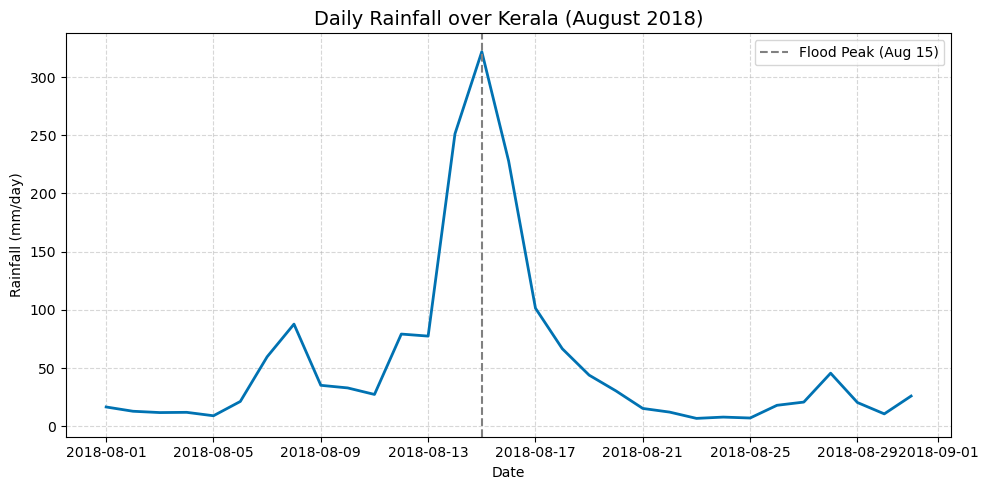

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_Land_tp_Kerala_Aug2018.nc")

# Extract total precipitation and convert to mm
tp_mm = ds['tp'] * 1000  # from m to mm

# Resample to daily total
tp_daily = tp_mm.resample(valid_time='1D').sum()

# Kerala bounding box (approx.)
lat_bounds = slice(12.5, 8.0)   # decreasing order
lon_bounds = slice(74.0, 78.0)  # increasing order

# Region-averaged rainfall
tp_kerala = tp_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])

# Plot daily rainfall
plt.figure(figsize=(10, 5))
plt.plot(tp_kerala['valid_time'], tp_kerala, color="#0072B2", linewidth=2)
plt.axvline(np.datetime64('2018-08-15'), linestyle='--', color='gray', label='Flood Peak (Aug 15)')
plt.title("Daily Rainfall over Kerala (August 2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Rainfall (mm/day)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# Select flood period
flood_period = tp_kerala.sel(valid_time=slice('2018-08-14', '2018-08-18'))

# Convert to DataFrame and print
print(flood_period.to_dataframe(name='Rainfall_mm_day'))


            number  Rainfall_mm_day
valid_time                         
2018-08-14       0       251.229477
2018-08-15       0       321.766083
2018-08-16       0       227.843613
2018-08-17       0       101.484497
2018-08-18       0        66.673424


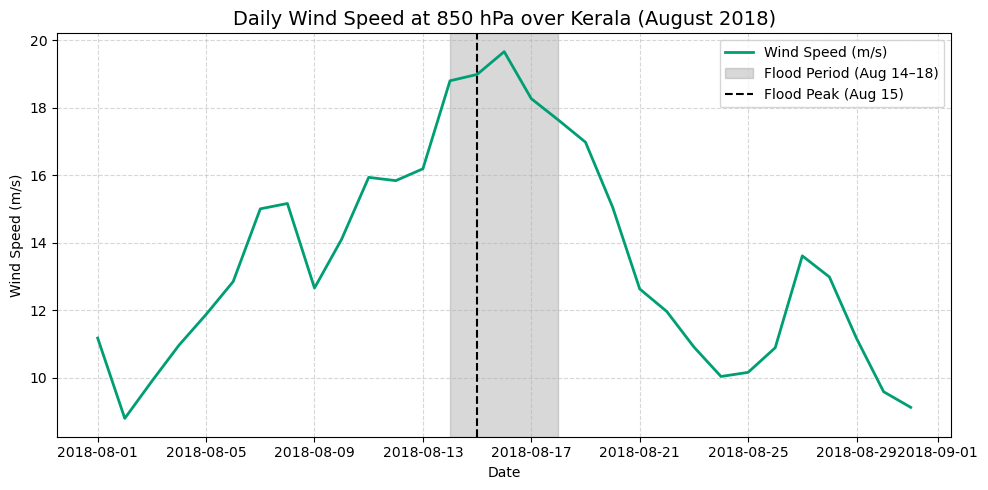

In [13]:
# Extract variables
u = ds_u['u'].sel(pressure_level=850)
v = ds_v['v'].sel(pressure_level=850)

# Calculate wind speed magnitude (m/s)
wind_speed = np.sqrt(u**2 + v**2)

# Resample to daily mean
wind_daily = wind_speed.resample(valid_time='1D').mean()

# Define Kerala bounds
lat_bounds = slice(12.5, 8.0)     # Southward
lon_bounds = slice(74.0, 78.0)    # Eastward

# Mean wind speed over Kerala region
wind_kerala = wind_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(wind_kerala['valid_time'], wind_kerala, color="#009E73", linewidth=2, label='Wind Speed (m/s)')

# Flood window shaded
plt.axvspan(np.datetime64('2018-08-14'), np.datetime64('2018-08-18'), color='grey', alpha=0.3, label='Flood Period (Aug 14–18)')
plt.axvline(np.datetime64('2018-08-15'), linestyle='--', color='black', label='Flood Peak (Aug 15)')

plt.title("Daily Wind Speed at 850 hPa over Kerala (August 2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Select flood period (Aug 14–18)
wind_flood = wind_kerala.sel(valid_time=slice('2018-08-14', '2018-08-18'))

# Convert to DataFrame and print
print(wind_flood.to_dataframe(name='Wind_Speed_mps').round(2))


            number  pressure_level  Wind_Speed_mps
valid_time                                        
2018-08-14       0           850.0       18.799999
2018-08-15       0           850.0       18.980000
2018-08-16       0           850.0       19.660000
2018-08-17       0           850.0       18.270000
2018-08-18       0           850.0       17.629999


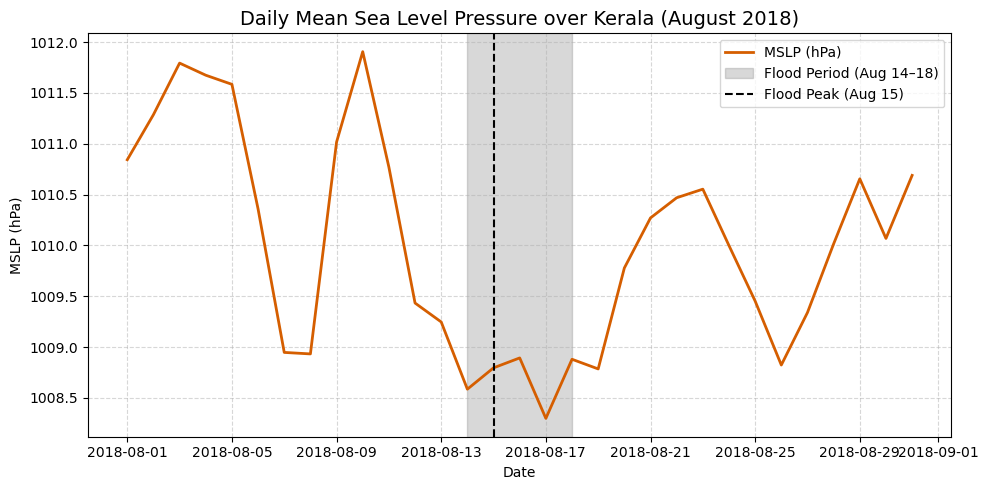

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
ds_mslp = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_2018.nc")

# Extract and convert units to hPa
mslp = ds_mslp['msl'] / 100.0  # Pa → hPa

# Resample to daily mean
mslp_daily = mslp.resample(valid_time='1D').mean()

# Kerala bounds
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)

# Regional average over Kerala
mslp_kerala = mslp_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(mslp_kerala['valid_time'], mslp_kerala, color="#D55E00", linewidth=2, label='MSLP (hPa)')

# Flood shading
plt.axvspan(np.datetime64('2018-08-14'), np.datetime64('2018-08-18'), color='grey', alpha=0.3, label='Flood Period (Aug 14–18)')
plt.axvline(np.datetime64('2018-08-15'), linestyle='--', color='black', label='Flood Peak (Aug 15)')

plt.title("Daily Mean Sea Level Pressure over Kerala (August 2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("MSLP (hPa)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Extract flood period values
mslp_flood = mslp_kerala.sel(valid_time=slice('2018-08-14', '2018-08-18'))

# Print table
print(mslp_flood.to_dataframe(name='MSLP_hPa').round(2))


            number     MSLP_hPa
valid_time                     
2018-08-14       0  1008.590027
2018-08-15       0  1008.799988
2018-08-16       0  1008.890015
2018-08-17       0  1008.299988
2018-08-18       0  1008.880005


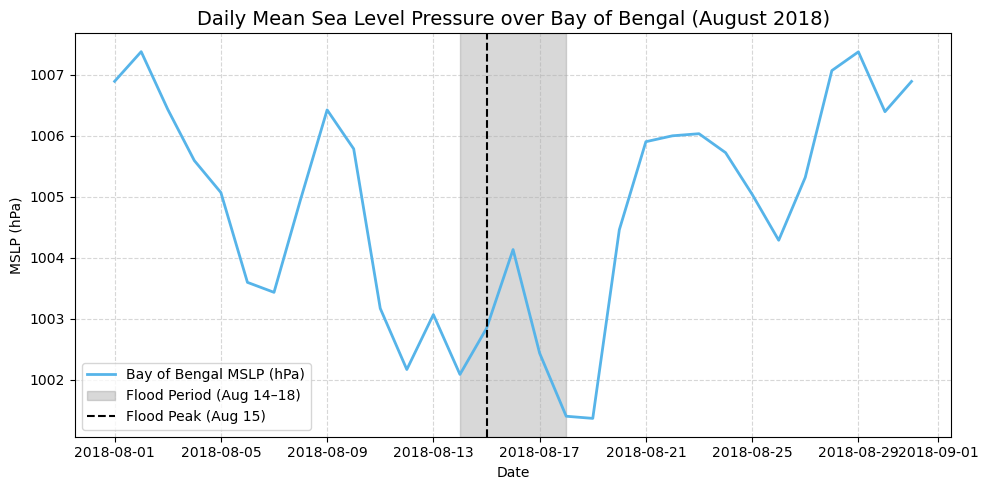

In [39]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load Bay of Bengal region file
ds_bay = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_MSLP_2018_periyarbasin_point.nc")

# Extract and convert from Pa → hPa
mslp_bay = ds_bay['msl'] / 100.0

# Resample to daily mean
mslp_bay_daily = mslp_bay.resample(valid_time='1D').mean()

# Regional average across the Bay grid
mslp_bay_mean = mslp_bay_daily.mean(dim=["latitude", "longitude"])

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(mslp_bay_mean['valid_time'], mslp_bay_mean, color="#56B4E9", linewidth=2, label='Bay of Bengal MSLP (hPa)')

# Highlight flood period
plt.axvspan(np.datetime64('2018-08-14'), np.datetime64('2018-08-18'), color='grey', alpha=0.3, label='Flood Period (Aug 14–18)')
plt.axvline(np.datetime64('2018-08-15'), linestyle='--', color='black', label='Flood Peak (Aug 15)')

plt.title("Daily Mean Sea Level Pressure over Bay of Bengal (August 2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("MSLP (hPa)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



In [41]:
# Print flood-period pressure
mslp_bay_flood = mslp_bay_mean.sel(valid_time=slice('2018-08-14', '2018-08-18'))
print(mslp_bay_flood.to_dataframe(name='Bay_MSLP_hPa').round(2))


            number  Bay_MSLP_hPa
valid_time                      
2018-08-14       0   1002.080017
2018-08-15       0   1002.840027
2018-08-16       0   1004.130005
2018-08-17       0   1002.429993
2018-08-18       0   1001.400024


In [25]:
import xarray as xr
import numpy as np

# Load U and V component datasets for August 2018
ds_u2018 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_850hPa_wind_2018.nc")
ds_v2018 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_850hPa_V_wind_2018.nc")

# Extract 850 hPa
u2018 = ds_u2018['u'].sel(pressure_level=850)
v2018 = ds_v2018['v'].sel(pressure_level=850)

# Wind direction in degrees (meteorological convention)
wind_dir_2018 = (np.arctan2(u2018, v2018) * (180 / np.pi)) % 360

# Define Kerala box
lat_bounds = slice(12.5, 7.5)
lon_bounds = slice(74.0, 78.0)

# Subset and take daily mean
wind_dir_2018_kerala = wind_dir_2018.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=["latitude", "longitude"])
wind_dir_2018_flood = wind_dir_2018_kerala.sel(valid_time=slice("2018-08-14", "2018-08-18"))

# Convert to DataFrame for printing
df_2018_wind_dir = wind_dir_2018_flood.to_dataframe(name='Wind_Direction_2018').round(1)
print(df_2018_wind_dir)



                     number  pressure_level expver  Wind_Direction_2018
valid_time                                                             
2018-08-14 00:00:00       0           850.0   0001            96.099998
2018-08-14 01:00:00       0           850.0   0001            96.199997
2018-08-14 02:00:00       0           850.0   0001            96.400002
2018-08-14 03:00:00       0           850.0   0001            96.300003
2018-08-14 04:00:00       0           850.0   0001            95.500000
...                     ...             ...    ...                  ...
2018-08-18 19:00:00       0           850.0   0001           113.099998
2018-08-18 20:00:00       0           850.0   0001           113.400002
2018-08-18 21:00:00       0           850.0   0001           114.099998
2018-08-18 22:00:00       0           850.0   0001           114.599998
2018-08-18 23:00:00       0           850.0   0001           115.699997

[120 rows x 4 columns]


In [29]:
import numpy as np

# 1. Extract U and V at 850 hPa
u_2018 = ds_u2018['u'].sel(pressure_level=850)
v_2018 = ds_v2018['v'].sel(pressure_level=850)

# 2. Calculate wind direction in degrees from North (meteorological convention)
wind_dir_2018 = (np.arctan2(-u_2018, -v_2018) * 180 / np.pi) % 360

# 3. Convert to daily average over Kerala
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)

# Daily mean
wind_dir_2018_daily = wind_dir_2018.resample(valid_time='1D').mean()

# Kerala average
wind_direction_2018 = wind_dir_2018_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=['latitude', 'longitude'])


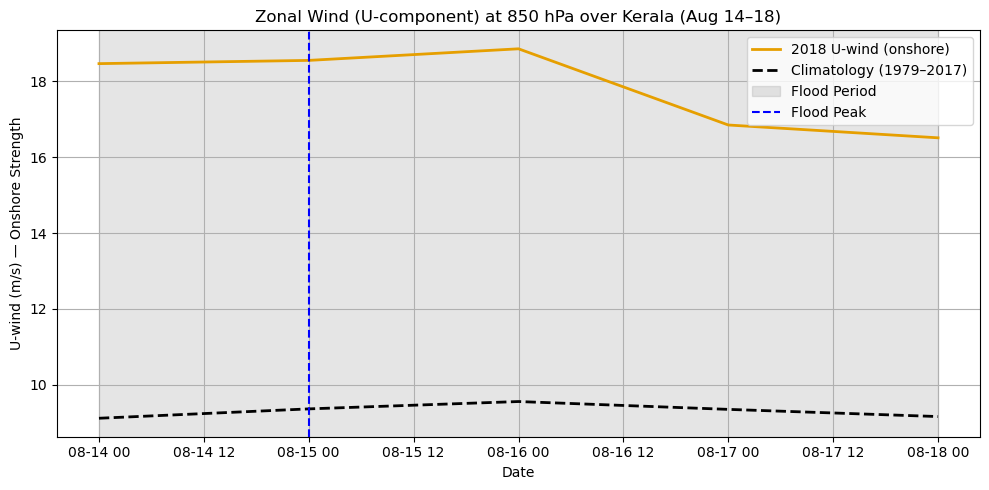

In [33]:
# Load 2018 U-wind at 850 hPa
ds_u2018 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_850hPa_wind_2018.nc")
u2018 = ds_u2018['u'].sel(pressure_level=850)

# Subset Kerala and resample to daily
lat_bounds = slice(12.5, 7.5)
lon_bounds = slice(74.0, 78.0)

u2018_daily = u2018.resample(valid_time='1D').mean()
u2018_kerala = u2018_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=['latitude', 'longitude'])

# Select flood period
u2018_flood = u2018_kerala.sel(valid_time=slice('2018-08-14', '2018-08-18')).to_dataframe(name='U_2018')

# Load all climatology U files
ds_u1 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_1979_1991.nc")
ds_u2 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_1992_2004.nc")
ds_u3 = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_2005_2017.nc")

u_all = xr.concat([ds_u1['u'], ds_u2['u'], ds_u3['u']], dim='valid_time').sel(pressure_level=850)

# Resample to daily and average over Kerala
u_all_daily = u_all.resample(valid_time='1D').mean()
u_all_kerala = u_all_daily.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=['latitude', 'longitude'])

# Convert to DataFrame
df_u = u_all_kerala.to_dataframe(name='U').reset_index()
df_u['day'] = df_u['valid_time'].dt.day
df_u['year'] = df_u['valid_time'].dt.year

# Select flood days only (Aug 14–18)
df_flood = df_u[df_u['day'].isin([14, 15, 16, 17, 18])]

# Group by day and compute mean across all years
climatology_u = df_flood.groupby('day')['U'].mean()

# Align index
dates = pd.date_range("2018-08-14", "2018-08-18")
climatology_u.index = dates
u2018_flood.index = dates

# Plot
plt.figure(figsize=(10, 5))
plt.plot(u2018_flood.index, u2018_flood['U_2018'], label='2018 U-wind (onshore)', color='#E69F00', linewidth=2)
plt.plot(climatology_u.index, climatology_u.values, label='Climatology (1979–2017)', linestyle='--', color='black', linewidth=2)

plt.axvspan(pd.Timestamp('2018-08-14'), pd.Timestamp('2018-08-18'), color='grey', alpha=0.2, label='Flood Period')
plt.axvline(pd.Timestamp('2018-08-15'), linestyle='--', color='blue', label='Flood Peak')

plt.title("Zonal Wind (U-component) at 850 hPa over Kerala (Aug 14–18)")
plt.ylabel("U-wind (m/s) — Onshore Strength")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [35]:
pip install windrose

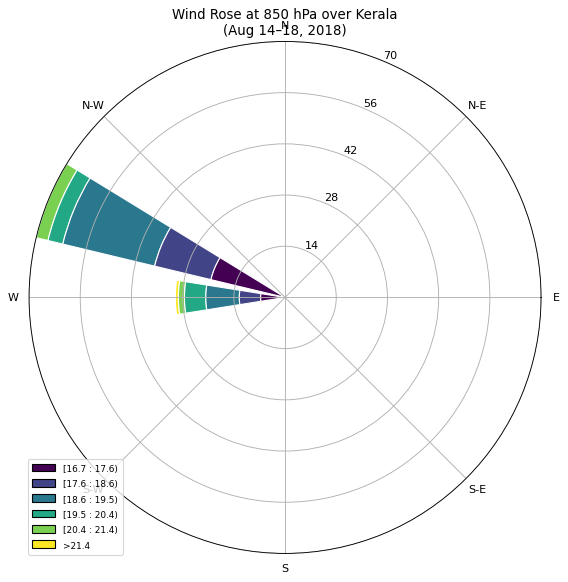

In [36]:
import numpy as np
import pandas as pd
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Load U and V for Aug 14–18
u_2018 = ds_u2018['u'].sel(pressure_level=850).sel(valid_time=slice("2018-08-14", "2018-08-18"))
v_2018 = ds_v2018['v'].sel(pressure_level=850).sel(valid_time=slice("2018-08-14", "2018-08-18"))

# Kerala average
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)

u_avg = u_2018.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=['latitude', 'longitude'])
v_avg = v_2018.sel(latitude=lat_bounds, longitude=lon_bounds).mean(dim=['latitude', 'longitude'])

# Calculate speed and direction
wind_speed = np.sqrt(u_avg**2 + v_avg**2)
wind_dir = (np.arctan2(-u_avg, -v_avg) * 180 / np.pi) % 360

# Convert to pandas
df = pd.DataFrame({
    'speed': wind_speed.values,
    'direction': wind_dir.values
}, index=pd.to_datetime(u_avg.valid_time.values))

# ✅ Fix: use actual colormap object, not string
ax = WindroseAxes.from_ax()
ax.bar(df['direction'], df['speed'], normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)
ax.set_legend()
plt.title("Wind Rose at 850 hPa over Kerala\n(Aug 14–18, 2018)")
plt.show()


In [39]:
import xarray as xr
import numpy as np
import pandas as pd

# File paths
u_files = [
    r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_1979_1991.nc",
    r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_1992_2004.nc",
    r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_U_2005_2017.nc"
]
v_files = [
    r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_V_1979_1991.nc",
    r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_V_1992_2004.nc",
    r"C:\Users\SANGETHA\Downloads\THESIS\ERA5_V_2005_2017.nc"
]

# Kerala bounds
lat_bounds = slice(12.5, 8.0)
lon_bounds = slice(74.0, 78.0)

# Store results
daily_means = []

# Loop through all U-V file pairs
for u_fp, v_fp in zip(u_files, v_files):
    ds_u = xr.open_dataset(u_fp)
    ds_v = xr.open_dataset(v_fp)

    # Extract 850 hPa
    u = ds_u['u'].sel(pressure_level=850, latitude=lat_bounds, longitude=lon_bounds)
    v = ds_v['v'].sel(pressure_level=850, latitude=lat_bounds, longitude=lon_bounds)

    # Wind speed
    wind = np.sqrt(u**2 + v**2)

    # Resample to daily mean
    wind_daily = wind.resample(valid_time="1D").mean()

    # Mean over Kerala
    wind_kerala = wind_daily.mean(dim=["latitude", "longitude"])

    # Add to list
    daily_means.append(wind_kerala)

# Combine across years
wind_climatology = xr.concat(daily_means, dim="valid_time")

import numpy as np

# Flatten and clean
clim_vals = wind_climatology.values.flatten()
clim_vals = clim_vals[~np.isnan(clim_vals)]  # remove NaNs

print("Min:", clim_vals.min(), "Max:", clim_vals.max(), "Total:", len(clim_vals))



Min: 2.0699952 Max: 19.896732 Total: 1209


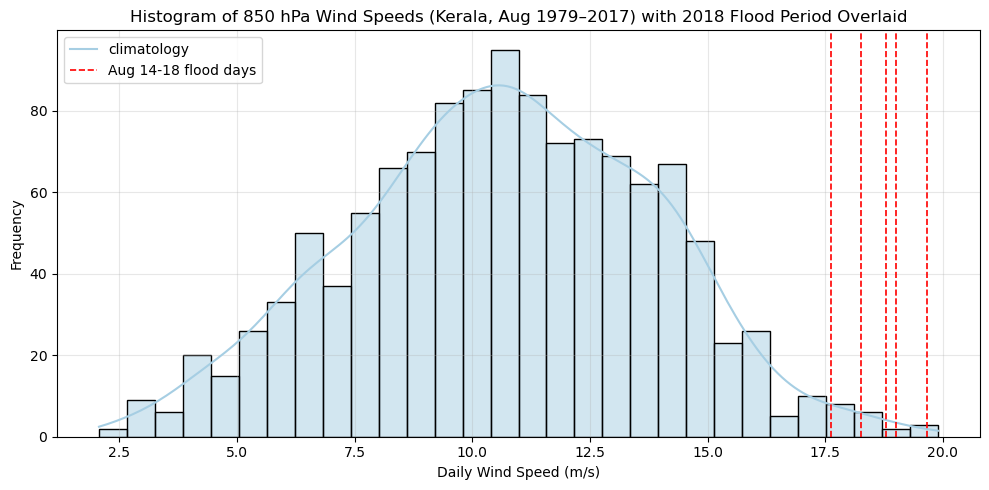

📅 August 14, 2018 → Wind = 18.80 m/s → Percentile = 99.67%
📅 August 15, 2018 → Wind = 19.00 m/s → Percentile = 99.75%
📅 August 16, 2018 → Wind = 19.66 m/s → Percentile = 99.83%
📅 August 17, 2018 → Wind = 18.27 m/s → Percentile = 99.26%
📅 August 18, 2018 → Wind = 17.63 m/s → Percentile = 98.59%


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

# 2018 wind values
wind_2018_flood = [18.8, 19.0, 19.66, 18.27, 17.63]

# --- Plot histogram ---
plt.figure(figsize=(10, 5))
sns.histplot(clim_vals, bins=30, color="#A6CEE3", edgecolor="black", kde=True, label="Climatology (1979–2017)")

# Overlay flood-period lines
for val in wind_2018_flood:
    plt.axvline(val, color="red", linestyle="--", linewidth=1.2)
    
plt.title("Histogram of 850 hPa Wind Speeds (Kerala, Aug 1979–2017) with 2018 Flood Period Overlaid")
plt.xlabel("Daily Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.legend(["climatology", "Aug 14-18 flood days"])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Print percentiles ---
for day, val in zip(range(14, 19), wind_2018_flood):
    pct = percentileofscore(clim_vals, val)
    print(f"📅 August {day}, 2018 → Wind = {val:.2f} m/s → Percentile = {pct:.2f}%")
